In [93]:
import numpy as np 
import pandas as pd 
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("mn_crimes_and_schools.csv")

In [3]:
data.head()

,tax_value,last_sold_price,property_size,zestimate_amount,bathrooms,zestimate_valuation_range_high,tax_year,zestimate_value_change,latitude,zestimate_percentile,...,TOTAL MISDEMEANOR OFFENSES_last_3_years,TOTAL MISDEMEANOR OFFENSES_percent_change,TOTAL NON-SEVEN MAJOR FELONY OFFENSES_last_3_years,TOTAL NON-SEVEN MAJOR FELONY OFFENSES_percent_change,TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years,TOTAL SEVEN MAJOR FELONY OFFENSES_percent_change,UNAUTHORIZED USE OF A VEHICLE_last_3_years,UNAUTHORIZED USE OF A VEHICLE_percent_change,VEHICLE AND TRAFFIC LAWS_last_3_years,VEHICLE AND TRAFFIC LAWS_percent_change
0,NaN,NaN,NaN,849427.0,1.0,1044795.0,NaN,NaN,40.724448,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
1,1642000.0,NaN,2250.0,NaN,2.0,NaN,2015.0,NaN,40.724420,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
2,1674000.0,NaN,2250.0,7332356.0,1.0,7992268.0,2015.0,NaN,40.724385,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
3,NaN,NaN,NaN,1991289.0,1.0,2708153.0,NaN,NaN,40.724332,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724845,0.0,...,4072.666667,11.540689,678.666667,0.342633,1364.0,1.539942,5.333333,15.789474,39.333333,-8.256881


In [4]:
data_best_features = pd.read_csv("train_best_features.csv")

In [5]:
data_best_features.columns.values

array(['tax_value', 'zestimate_amount', 'bathrooms', 'latitude',
       'bedrooms', 'home_size',
       'MURDER & NON NEGL. MANSLAUGHTER_last_3_years', 'RAPE_last_3_years',
       'ROBBERY_last_3_years',
       'TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years',
       'schools_Number Tested', 'schools_mean score',
       'home_type_Apartment', 'home_type_Condominium',
       'home_type_Cooperative', 'home_type_Duplex',
       'home_type_Miscellaneous', 'home_type_MultiFamily2To4',
       'home_type_Quadruplex', 'home_type_SingleFamily',
       'home_type_Townhouse', 'home_type_Unknown',
       'neighborhood_Battery Park', 'neighborhood_Bedford-Stuyvesant',
       'neighborhood_Borough Park', 'neighborhood_Carnegie Hill',
       'neighborhood_Chelsea', 'neighborhood_Chinatown',
       'neighborhood_Clinton', 'neighborhood_East Harlem',
       'neighborhood_East Village', 'neighborhood_Greenwich Village',
       'neighborhood_Hamilton Heights', 'neighborhood_Harlem',
       'neighborhood_

In [6]:
def get_precinct (neighborhood):
    subset = data[data['neighborhood'] == neighborhood]
    precincts = subset['precinct'].unique()
    len_list = []
    for precinct in precincts:
        length = len(subset[subset['precinct'] == precinct])
        len_list += [length]
    max_ind = np.argmax(len_list)
    max_precinct = precincts[max_ind]
    
    return max_precinct

In [7]:
def get_schooldist (neighborhood):
    subset = data[data['neighborhood'] == neighborhood]
    schooldists = subset['schooldistrict'].unique()
    len_list = []
    for schooldist in schooldists:
        length = len(subset[subset['schooldistrict'] == schooldist])
        len_list += [length]
    max_ind = np.argmax(len_list)
    max_schooldist = schooldists[max_ind]
    
    return max_schooldist

In [8]:
def get_feature (neighborhood, home_type, feature):
    neighborhood_new = neighborhood.split("_")[1]
    home_type_new = home_type.split("_")[2]
    subset = data[data['neighborhood'] == neighborhood_new]
    subset = subset[subset['home_type'] == home_type_new]
    subset = subset[np.isfinite(subset[feature])]
    med = np.median(subset[feature])
    
    return med

In [41]:
df = pd.DataFrame(columns=data_best_features.columns.values)

In [42]:
used_neighborhoods = ['neighborhood_Battery Park', 'neighborhood_Bedford-Stuyvesant',
       'neighborhood_Borough Park', 'neighborhood_Carnegie Hill',
       'neighborhood_Chelsea', 'neighborhood_Chinatown',
       'neighborhood_Clinton', 'neighborhood_East Harlem',
       'neighborhood_East Village', 'neighborhood_Greenwich Village',
       'neighborhood_Hamilton Heights', 'neighborhood_Harlem',
       'neighborhood_Inwood', 'neighborhood_Lower East Side',
       'neighborhood_Morningside Heights',
       'neighborhood_North Sutton Area', 'neighborhood_Soho',
       'neighborhood_Tribeca', 'neighborhood_Upper East Side',
       'neighborhood_Upper West Side', 'neighborhood_Washington Heights',
       'neighborhood_West Village', 'neighborhood_Williamsburg',
       'neighborhood_Yorkville']

In [43]:
used_home_types = ['home_type_Apartment', 'home_type_Condominium',
       'home_type_Cooperative', 'home_type_Duplex',
       'home_type_Miscellaneous', 'home_type_MultiFamily2To4',
       'home_type_Quadruplex', 'home_type_SingleFamily',
       'home_type_Townhouse', 'home_type_Unknown']

In [44]:
num_cols = data_best_features.shape[1]

In [45]:
ind = 0

hometypes_bed_bath = {"home_type_Apartment": [(1,1), (2,1), (3,1)], "home_type_Condominium": [(2, 1.5)], \
             "home_type_Cooperative": [(2,1)], "home_type_Duplex": [(2,2.25)], "home_type_MultiFamily2To4": [(1,1)], \
             "home_type_Quadruplex": [(1,1)], "home_type_SingleFamily": [(2,2)], "home_type_Townhouse": [(4,3)], 
                      "home_type_Miscellaneous": [(1,1)], "home_type_Unknown": [(1,1)]}

for neighborhood in used_neighborhoods:
    for home_type in used_home_types:
        row = [0] * num_cols
        neigh_ind = used_neighborhoods.index(neighborhood)
        home_ind = used_home_types.index(home_type)
        # fill in home type
        row[home_ind + 12] = 1
        # fill in neighborhood
        row[neigh_ind + 22] = 1
        # fill in bathrooms and bedrooms
        beds = hometypes_bed_bath[home_type][0][0]
        baths = hometypes_bed_bath[home_type][0][1]
        row[2] = baths
        row[4] = beds
        # fill in tax value
        tax_val = get_feature(neighborhood, home_type, 'tax_value')
        row[0] = tax_val
        # fill in home size
        home_size = get_feature(neighborhood, home_type, 'home_size')
        row[5] = home_size
        # fill in latitude
        latitude = get_feature(neighborhood, home_type, 'latitude')
        row[3] = latitude
        # fill in crime and school info
        for i in range(6, 12):
            row[i] = get_feature(neighborhood, home_type, data_best_features.columns.values[i])
        
        df.loc[ind] = row
        
        ind += 1
        
        

In [46]:
len(df)

240

In [48]:
home_type = "home_type_Apartment"
ind = 240
apartment_bedrooms = [(2,1), (3,1)]

for size in apartment_bedrooms:
    for neighborhood in used_neighborhoods:
        row = [0] * num_cols
        neigh_ind = used_neighborhoods.index(neighborhood)
        home_ind = used_home_types.index(home_type)
        # fill in home type
        row[home_ind + 12] = 1
        # fill in neighborhood
        row[neigh_ind + 22] = 1
        # fill in bathrooms and bedrooms
        beds = size[0]
        baths = size[1]
        row[2] = baths
        row[4] = beds
        # fill in tax value
        tax_val = get_feature(neighborhood, home_type, 'tax_value')
        row[0] = tax_val
        # fill in home size
        home_size = get_feature(neighborhood, home_type, 'home_size')
        row[5] = home_size
        # fill in latitude
        latitude = get_feature(neighborhood, home_type, 'latitude')
        row[3] = latitude
        # fill in crime and school info
        for i in range(6, 12):
            row[i] = get_feature(neighborhood, home_type, data_best_features.columns.values[i])
        
        df.loc[ind] = row
        
        ind += 1


In [49]:
df = df.dropna()

In [50]:
len(df)

228

In [51]:
df = df.drop(["zestimate_amount"], 1)

In [52]:
df.to_csv("df_to_predict.csv", index = False)

In [65]:
hometypes_bed_bath = {"home_type_Apartment": [(1,1), (2,1), (3,1)], "home_type_Condominium": [(2, 1.5)], \
             "home_type_Cooperative": [(2,1)], "home_type_Duplex": [(2,2.25)], "home_type_MultiFamily2To4": [(1,1)], \
             "home_type_Quadruplex": [(1,1)], "home_type_SingleFamily": [(2,2)], "home_type_Townhouse": [(4,3)]}

for hometype in hometypes.keys():
    for (bed,bath) in hometypes[hometype]:
        print hometype
        print bed, bath

home_type_Apartment
1 1
home_type_Apartment
2 1
home_type_Apartment
3 1
home_type_Duplex
2 2.25
home_type_Townhouse
4 3
home_type_Cooperative
2 1
home_type_MultiFamily2To4
1 1
home_type_SingleFamily
2 2
home_type_Quadruplex
1 1
home_type_Condominium
2 1.5


In [53]:
x_train = data_best_features.drop(['zestimate_amount'],1)
y_train = data_best_features['zestimate_amount']

In [56]:
model = ensemble.RandomForestRegressor(n_estimators = 50, max_depth = 35)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [59]:
predictions = model.predict(df)

In [60]:
df["predictions"] = predictions

In [62]:
df.head()

,tax_value,bathrooms,latitude,bedrooms,home_size,MURDER & NON NEGL. MANSLAUGHTER_last_3_years,RAPE_last_3_years,ROBBERY_last_3_years,TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years,schools_Number Tested,...,neighborhood_North Sutton Area,neighborhood_Soho,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village,neighborhood_Williamsburg,neighborhood_Yorkville,predictions
1,263337.5,1.50,40.709596,2.0,982.0,0.333333,9.000000,65.666667,1356.666667,15070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.557438e+06
5,380911.0,1.00,40.716257,1.0,875.0,0.333333,9.000000,65.666667,1356.666667,15070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.442575e+06
7,315456.0,2.00,40.728474,2.0,1870.0,0.333333,9.000000,65.666667,1356.666667,15070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.490225e+06
10,1050088.5,1.00,40.692957,1.0,4051.5,0.666667,7.333333,122.333333,741.333333,4581.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.834907e+06
13,483000.0,2.25,40.689930,2.0,2610.0,0.666667,7.333333,122.333333,741.333333,4581.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.193652e+06


In [68]:
df.index.values

array([  1,   5,   7,  10,  13,  15,  17,  18,  20,  21,  22,  23,  25,
        27,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  41,  42,
        43,  45,  46,  47,  48,  51,  55,  57,  60,  61,  62,  63,  65,
        66,  67,  68,  70,  71,  72,  73,  75,  76,  77,  78,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,  94,  95,
        96,  97,  98, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126,
       127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141,
       142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157,
       158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172,
       173, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       220, 221, 223, 225, 227, 228, 229, 230, 231, 232, 233, 23

In [64]:
df.loc[1]['neighborhood_Battery Park']

1.0

In [71]:
len(df)

228

In [82]:
neigh_list = np.empty(len(df), dtype = object)
ht_list = np.empty(len(df), dtype = object)

ind = 0
for i in df.index.values:
    for neighborhood in used_neighborhoods:
        if df.loc[i][neighborhood] == 1:
            neigh_list[ind] = neighborhood.split("_")[1]
    for home_type in used_home_types:
        if df.loc[i][home_type] == 1:
            if home_type == "home_type_Apartment":
                ht_list[ind] = "Apartment - " + str(int(df.loc[i]['bedrooms'])) + " bedrooms"
            else:
                ht_list[ind] = home_type.split("_")[2]
    ind +=1
            

In [83]:
results_df = pd.DataFrame(neigh_list, columns = ["neighborhood"])
results_df["home_type"] = ht_list
results_df["predicted_price"] = predictions

In [84]:
results_df

,neighborhood,home_type,predicted_price
0,Battery Park,Condominium,1.557438e+06
1,Battery Park,MultiFamily2To4,1.442575e+06
2,Battery Park,SingleFamily,1.490225e+06
3,Bedford-Stuyvesant,Apartment - 1 bedrooms,6.834907e+06
4,Bedford-Stuyvesant,Duplex,4.193652e+06
5,Bedford-Stuyvesant,MultiFamily2To4,1.988687e+06
6,Bedford-Stuyvesant,SingleFamily,1.820437e+06
7,Bedford-Stuyvesant,Townhouse,3.133889e+06
8,Borough Park,Apartment - 1 bedrooms,1.544342e+06
9,Borough Park,Condominium,1.589906e+06


In [85]:
results_df.to_csv("results_df.csv", index = False)

In [125]:
results_df = results_df.sort(["neighborhood", "home_type"], ascending= True)

/Users/marinaadario/marinaadario/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


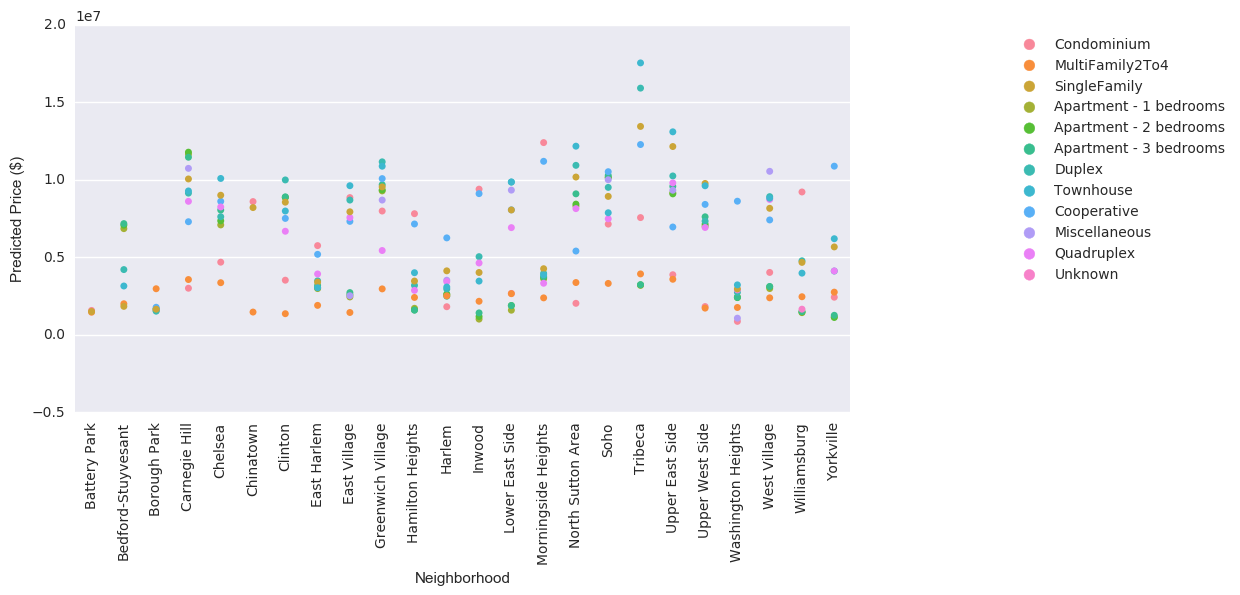

In [126]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.stripplot(results_df["neighborhood"], results_df["predicted_price"], results_df["home_type"])
ax.set_xticklabels(results_df["neighborhood"].unique(), rotation=90)
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Predicted Price ($)")
ax.legend(bbox_to_anchor=(1.5, 1))